<a href="https://colab.research.google.com/github/claudiogit2019/About-me/blob/main/proyecto_siniestros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import os
import json
import ast
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from scipy.stats import ttest_ind

# **DATA HOMICIDIOS/HECHOS**

In [ ]:
limpieza_data_homicidios= pd.read_excel('/content/drive/MyDrive/data_homicidios.xlsx')

In [ ]:
limpieza_data_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01 00:00:00,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-02-01 00:00:00,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS


In [ ]:
limpieza_data_homicidios.shape

(696, 21)

In [ ]:
limpieza_data_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [ ]:
limpieza_data_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [ ]:
limpieza_data_homicidios['FECHA'] = pd.to_datetime(limpieza_data_homicidios['FECHA'])

In [ ]:
limpieza_data_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [ ]:
limpieza_data_homicidios.tail(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.379762,-34.586796,BICICLETA-AUTO,BICICLETA,AUTO


***# Vamos a dividir en primera instancia en tres dataframe***

---



**df_Id_victimas**

**df_id_lugar**

**df_id_acusado**


---



***df_id_victimas***

In [ ]:
df_id_victimas=limpieza_data_homicidios[['ID',	'N_VICTIMAS',	'FECHA',	'AAAA',	'MM','DD',	'HORA',	'HH']]

In [ ]:
df_id_victimas.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4
1,2016-0002,1,2016-02-01,2016,1,2,01:15:00,1
2,2016-0003,1,2016-03-01,2016,1,3,07:00:00,7


In [ ]:
df_id_victimas.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH'], dtype='object')

In [ ]:
df_id_victimas.columns = ['ID','Nro_victimas','Fecha', 'Año', 'Mes', 'Dia', 'Hora', 'Franja_horaria']


In [ ]:
df_id_victimas

,ID,Nro_victimas,Fecha,Año,Mes,Dia,Hora,Franja_horaria
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4
1,2016-0002,1,2016-02-01,2016,1,2,01:15:00,1
2,2016-0003,1,2016-03-01,2016,1,3,07:00:00,7
3,2016-0004,1,2016-10-01,2016,1,10,00:00:00,0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5
...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10


**df_id_lugar**

In [ ]:
limpieza_data_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [ ]:
df_id_lugar=limpieza_data_homicidios[['ID','LUGAR_DEL_HECHO', 'TIPO_DE_CALLE','Calle','Altura','Cruce','Dirección Normalizada','COMUNA','XY (CABA)','pos x','pos y']]

In [ ]:
df_id_lugar.head(3)

,ID,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y
0,2016-0001,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757
1,2016-0002,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777
2,2016-0003,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894


**df_id_acusado**

In [ ]:
df_id_acusado=limpieza_data_homicidios[['ID','PARTICIPANTES', 'VICTIMA','ACUSADO']]

In [ ]:
df_id_acusado

,ID,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,MOTO-AUTO,MOTO,AUTO
1,2016-0002,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,MOTO-AUTO,MOTO,AUTO
3,2016-0004,MOTO-SD,MOTO,SD
4,2016-0005,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...
691,2021-0093,MOTO-AUTO,MOTO,AUTO
692,2021-0094,MOTO-AUTO,MOTO,AUTO
693,2021-0095,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,AUTO-CARGAS,AUTO,CARGAS


**Vamos a Guardar en formato CSV los dataframe**

**df_id_acusado**

**df_id_lugar**

**df_id_victimas**




In [ ]:
# Guardar el DataFrame en un archivo CSV
df_id_acusado.to_csv('/content/drive/MyDrive/registro_acusados.csv', index=False)

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_id_lugar.to_csv('/content/drive/MyDrive/registro_lugar.csv', index=False)

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_id_victimas.to_csv('/content/drive/MyDrive/registro_victimas.csv', index=False)

# **DATA HOMICIDIOS/ VICTIMAS**

In [ ]:
limpieza_data_victimas= pd.read_excel('/content/drive/MyDrive/data_victimas.xlsx')

In [ ]:
limpieza_data_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01 00:00:00,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-02-01 00:00:00,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-02-01 00:00:00
2,2016-0003,2016-03-01 00:00:00,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-03-01 00:00:00
3,2016-0004,2016-10-01 00:00:00,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12 00:00:00,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-02-01 00:00:00


In [ ]:
limpieza_data_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [ ]:
limpieza_data_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [ ]:
limpieza_data_victimas['FECHA'] = pd.to_datetime(limpieza_data_victimas['FECHA'])

In [ ]:
limpieza_data_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(limpieza_data_victimas['FECHA_FALLECIMIENTO'],errors='coerce')

In [ ]:
limpieza_data_victimas.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-02-01
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20


In [ ]:
limpieza_data_victimas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  649 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 56.1+ KB


In [ ]:
limpieza_data_victimas.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                    0
FECHA_FALLECIMIENTO    68
dtype: int64

In [ ]:
limpieza_data_victimas.duplicated().sum()

0

In [ ]:
limpieza_data_victimas.shape

(717, 10)

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_data_victimas.to_csv('/content/drive/MyDrive/registro_homicidios_victimas.csv', index=False)

# **DATA LESIONES HECHOS**

In [ ]:
limpieza_lesiones_hechos= pd.read_excel('/content/drive/MyDrive/lesiones.xlsx')

In [ ]:
limpieza_lesiones_hechos.shape

(23785, 27)

In [ ]:
limpieza_lesiones_hechos.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [ ]:
limpieza_lesiones_hechos.head(2)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD


In [ ]:
limpieza_lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [ ]:
limpieza_lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [ ]:
limpieza_lesiones_hechos['fecha'] = pd.to_datetime(limpieza_lesiones_hechos['fecha'])

In [ ]:
limpieza_lesiones_hechos.duplicated().sum()

0

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_lesiones_hechos.to_csv('/content/drive/MyDrive/registro_lesiones_hechos.csv', index=False)

# **DATA LESIONES VICTIMAS**

In [ ]:
limpieza_lesiones_victimas= pd.read_excel('/content/drive/MyDrive/lesiones_victimas.xlsx')

In [ ]:
limpieza_lesiones_victimas.shape

(27605, 9)

In [ ]:
limpieza_lesiones_victimas.columns

Index(['ID hecho', 'AAA', 'MM', 'DD', 'FECHA ', 'VEHICULO_VICTIMA', 'SEXO',
       'EDAD_VICTIMA', 'GRAVEDAD'],
      dtype='object')

In [ ]:
limpieza_lesiones_victimas.head(5)

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


In [ ]:
limpieza_lesiones_victimas.tail(5)

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD
27604,LC-2021-0229350,2021,5,19,2021-05-19,MOTO,Varon,41,SD


In [ ]:
limpieza_lesiones_victimas.isnull().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

In [ ]:
limpieza_lesiones_victimas.duplicated().sum()

622

In [ ]:
limpieza_lesiones_victimas = limpieza_lesiones_victimas.drop_duplicates()


In [ ]:
limpieza_lesiones_victimas.duplicated().sum()

0

In [ ]:
# Guardar el DataFrame en un archivo CSV
limpieza_lesiones_victimas.to_csv('/content/drive/MyDrive/registro_lesiones_victimas.csv', index=False)

# **EDA - Analisis Exploratorio de Datos I**

**Búsqueda de Valores Faltantes**

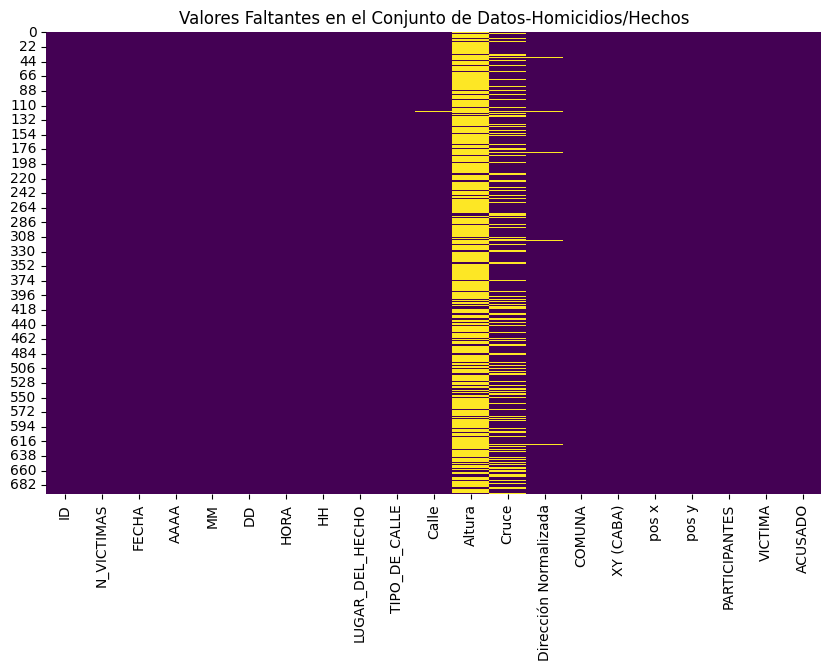

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(limpieza_data_homicidios.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos-Homicidios/Hechos')
plt.show()


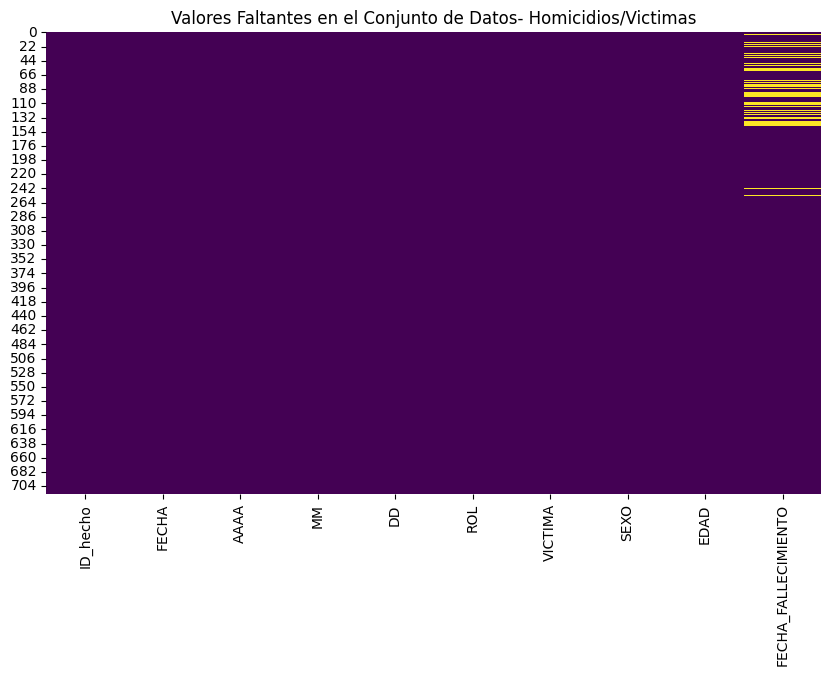

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(limpieza_data_victimas.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos- Homicidios/Victimas')
plt.show()

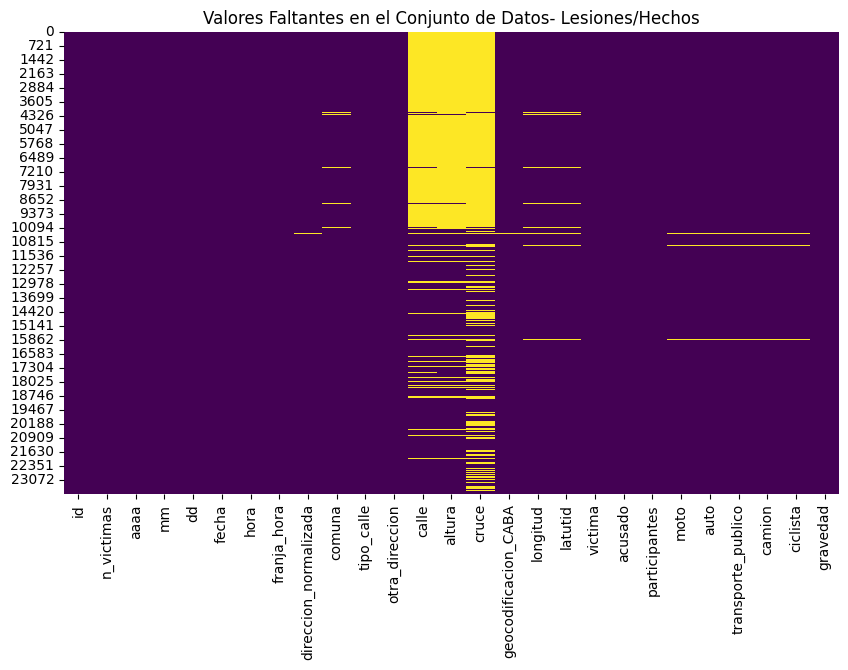

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(limpieza_lesiones_hechos.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos- Lesiones/Hechos')
plt.show()

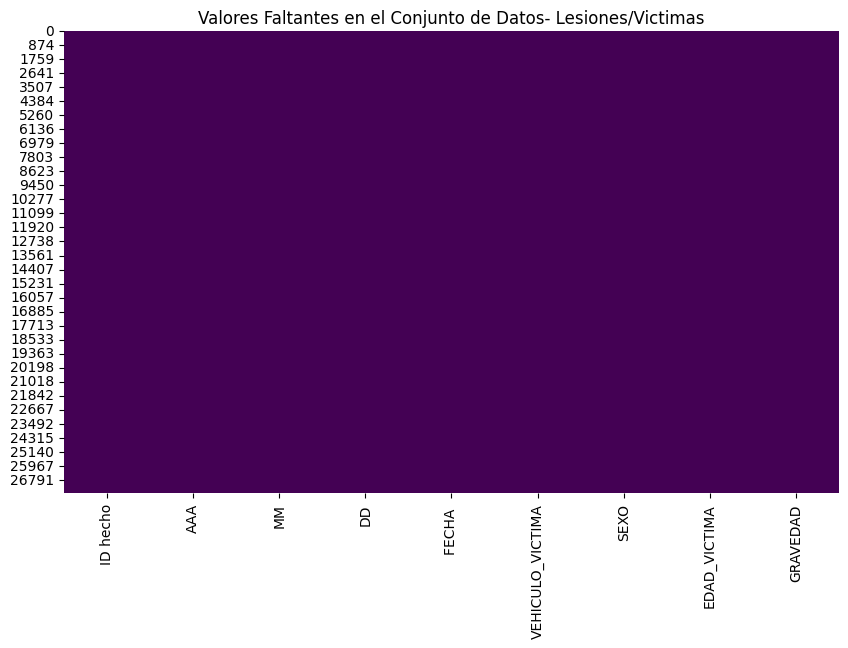

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(limpieza_lesiones_victimas.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Conjunto de Datos- Lesiones/Victimas')
plt.show()

**Exploración de Variables Numéricas**

**Homicidios- Hechos**

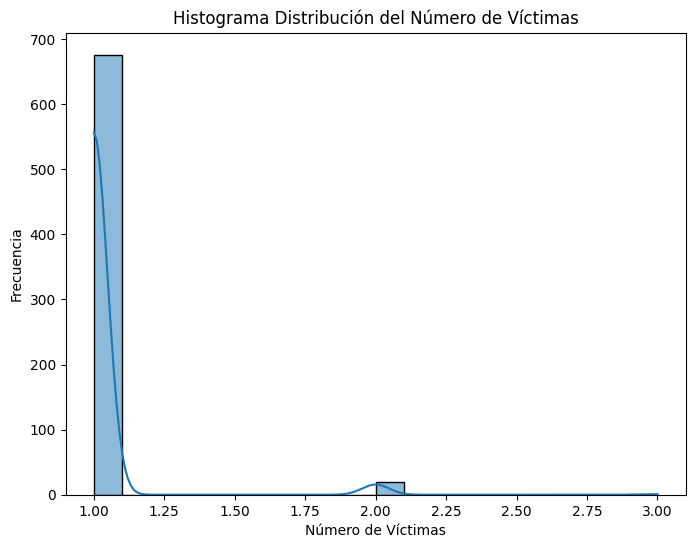

In [ ]:
                                        # Histograma de una variable numérica -'N_VICTIMAS'
plt.figure(figsize=(8, 6))
sns.histplot(limpieza_data_homicidios['N_VICTIMAS'], bins=20, kde=True)
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución del Número de Víctimas')
plt.show()


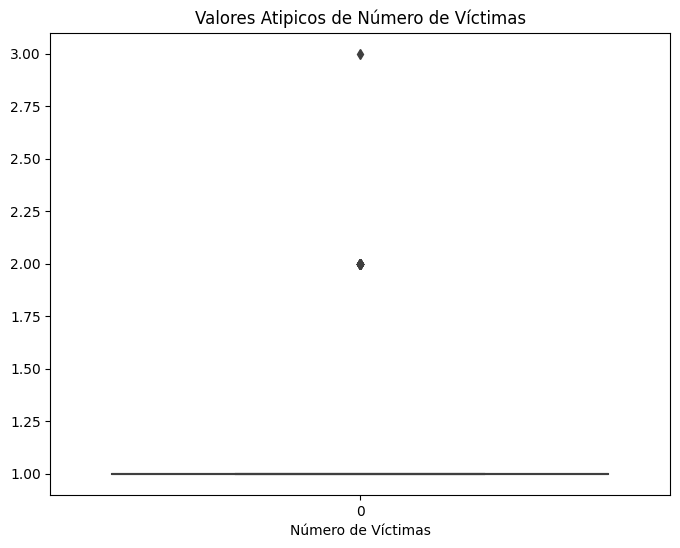

In [ ]:
                            # valores atípicos (outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(limpieza_data_homicidios['N_VICTIMAS'])
plt.xlabel('Número de Víctimas')
plt.title('Valores Atipicos de Número de Víctimas')
plt.show()

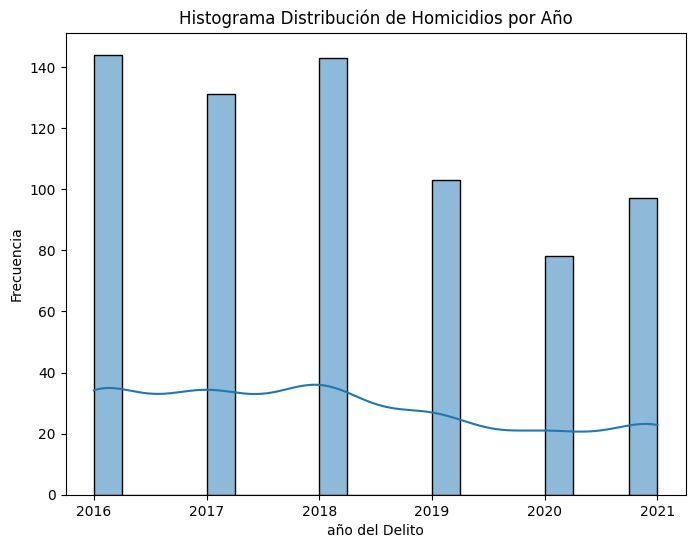

In [ ]:
                            # Histograma de una variable numérica -'FECHA DEL HOMICIDIO'
plt.figure(figsize=(8, 6))
sns.histplot(limpieza_data_homicidios['AAAA'], bins=20, kde=True)
plt.xlabel('año del Delito')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución de Homicidios por Año')
plt.show()

<ipython-input-63-65ffd33836a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



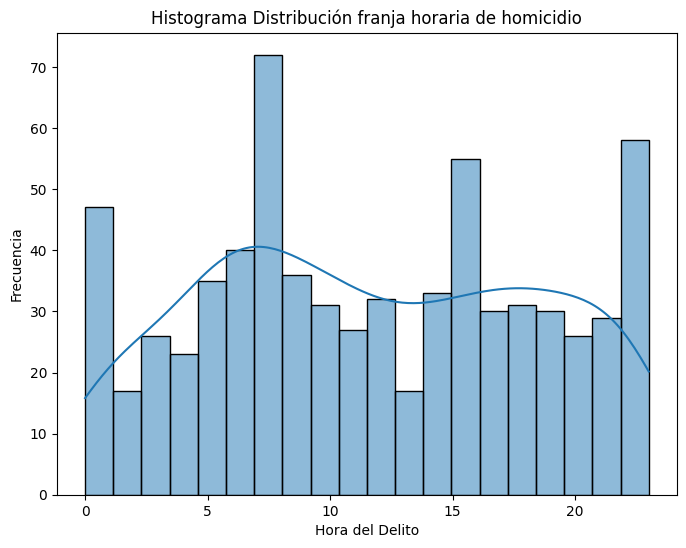

In [ ]:
filtro_data = limpieza_data_homicidios[limpieza_data_homicidios['HH'] != 'SD']

filtro_data['HH'] = pd.to_numeric(filtro_data['HH'], errors='coerce')

# histograma
plt.figure(figsize=(8, 6))
sns.histplot(filtro_data['HH'], bins=20, kde=True)
plt.xlabel('Hora del Delito')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución franja horaria de homicidio')
plt.show()


**Homicidios - Victimas**

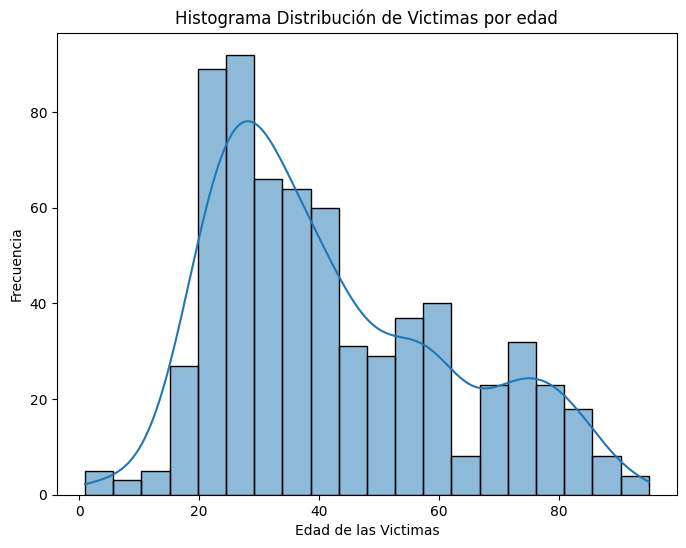

In [ ]:
filtro = limpieza_data_victimas[limpieza_data_victimas['EDAD'] != 'SD']
# histograma
plt.figure(figsize=(8, 6))
sns.histplot(filtro['EDAD'], bins=20, kde=True)
plt.xlabel('Edad de las Victimas')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución de Victimas por edad')
plt.show()

**Exploración de Variables Categóricas**

**Homicidios - Hechos**

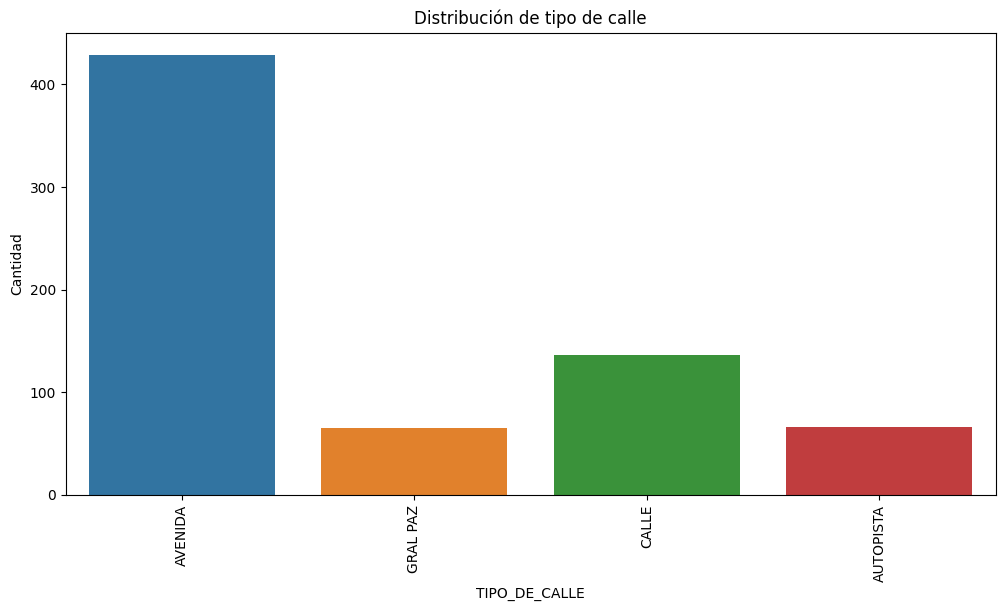

In [ ]:
                                  # Gráfico de barras para una variable categórica /LUGAR_DEL_HECHO)
plt.figure(figsize=(12, 6))
sns.countplot(data=limpieza_data_homicidios, x='TIPO_DE_CALLE')
plt.xticks(rotation=90)
plt.xlabel('TIPO_DE_CALLE')
plt.ylabel('Cantidad')
plt.title('Distribución de tipo de calle')
plt.show()


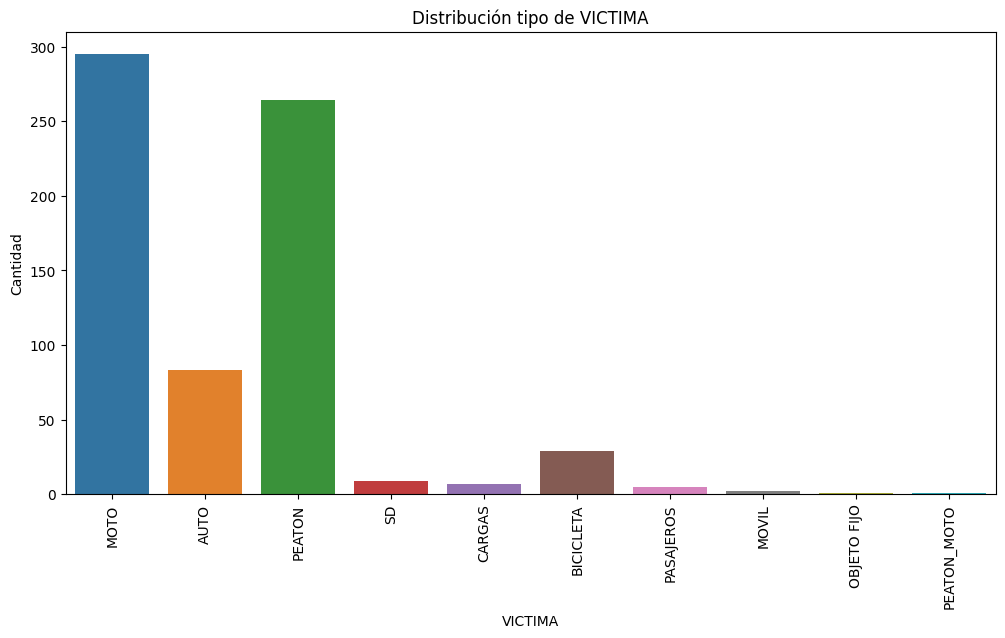

In [ ]:
                                    # Gráfico de barras para una variable categórica /VICTIMA)
plt.figure(figsize=(12, 6))
sns.countplot(data=limpieza_data_homicidios, x='VICTIMA')
plt.xticks(rotation=90)
plt.xlabel('VICTIMA')
plt.ylabel('Cantidad')
plt.title('Distribución tipo de VICTIMA')
plt.show()

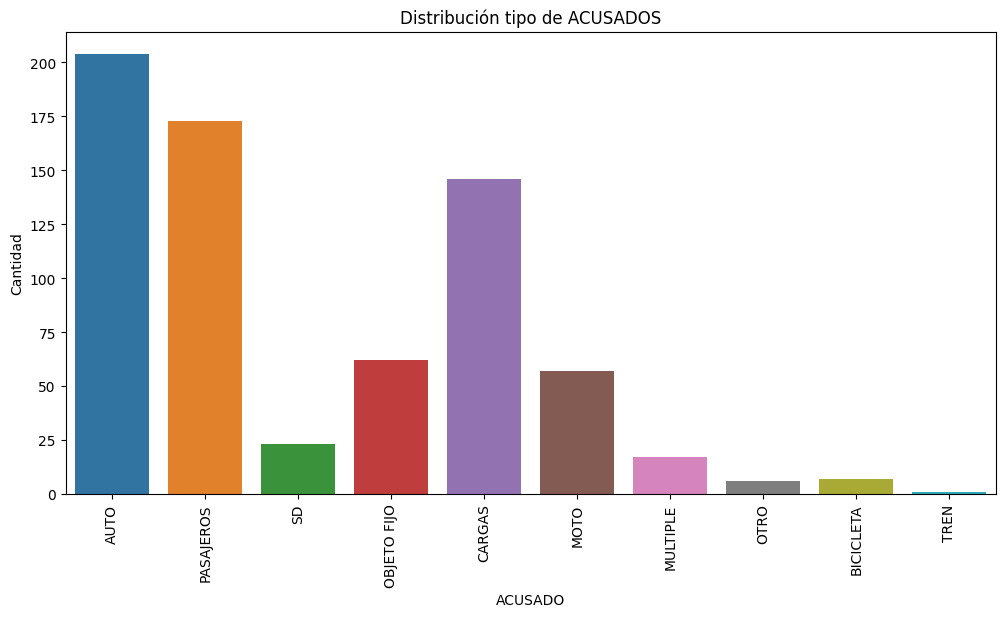

In [ ]:
                                          # Gráfico de barras para una variable categórica /ACUSADO)
plt.figure(figsize=(12, 6))
sns.countplot(data=limpieza_data_homicidios, x='ACUSADO')
plt.xticks(rotation=90)
plt.xlabel('ACUSADO')
plt.ylabel('Cantidad')
plt.title('Distribución tipo de ACUSADOS')
plt.show()

Homicidios - Victimas

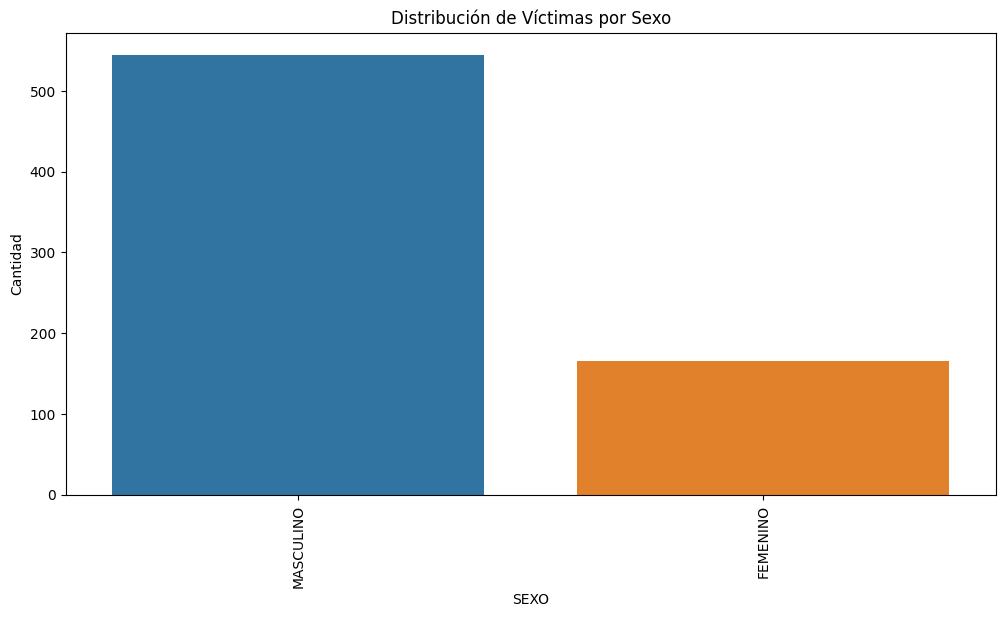

In [ ]:

filtro = limpieza_data_victimas[limpieza_data_victimas['SEXO'] != 'SD']

                              #gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=filtro, x='SEXO')
plt.xticks(rotation=90)
plt.xlabel('SEXO')
plt.ylabel('Cantidad')
plt.title('Distribución de Víctimas por Sexo')
plt.show()


**Exploración de Variables Numéricas**

**Lesiones - Hechos**

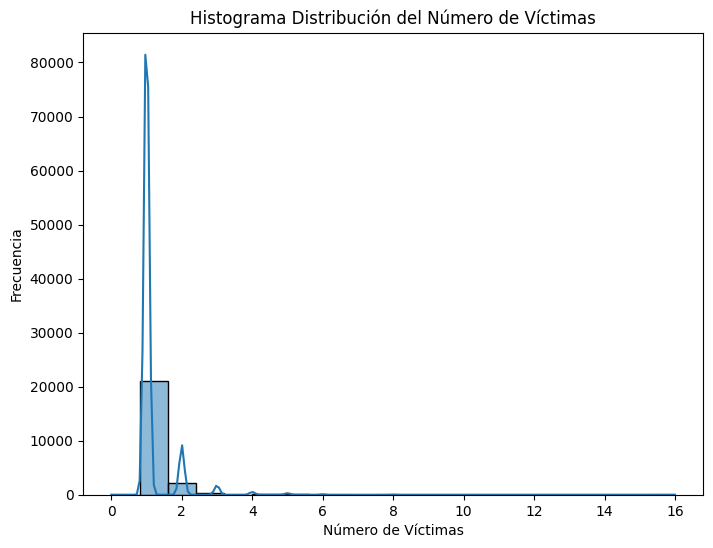

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(limpieza_lesiones_hechos['n_victimas'], bins=20, kde=True)
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución del Número de Víctimas')
plt.show()

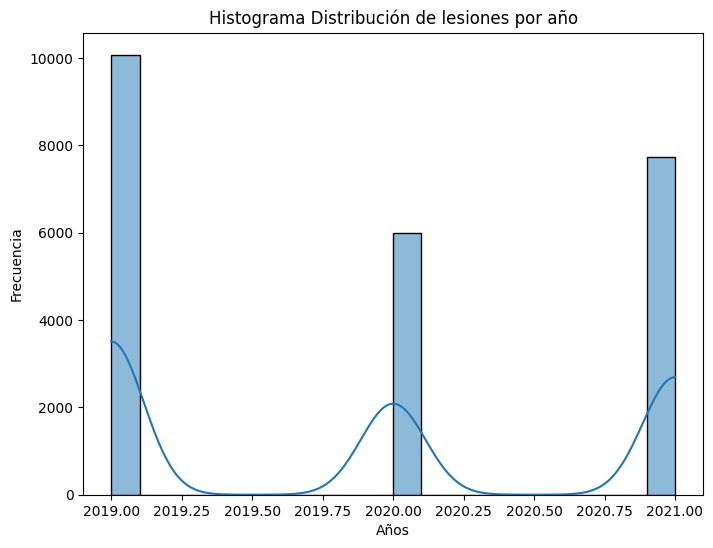

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(limpieza_lesiones_hechos['aaaa'], bins=20, kde=True)
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución de lesiones por año')
plt.show()

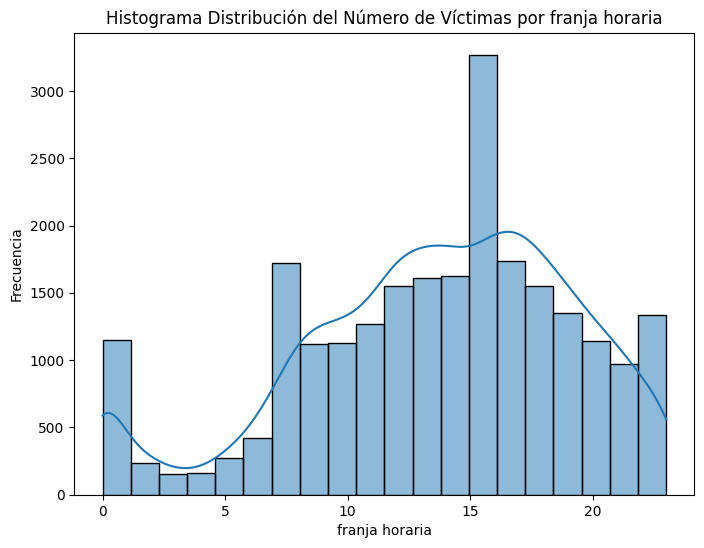

In [ ]:
filtro = limpieza_lesiones_hechos[limpieza_lesiones_hechos['franja_hora'] != 'sd']

plt.figure(figsize=(8, 6))
sns.histplot(filtro['franja_hora'], bins=20, kde=True)
plt.xlabel('franja horaria')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución del Número de Víctimas por franja horaria')
plt.show()

**Lesiones - victimas**

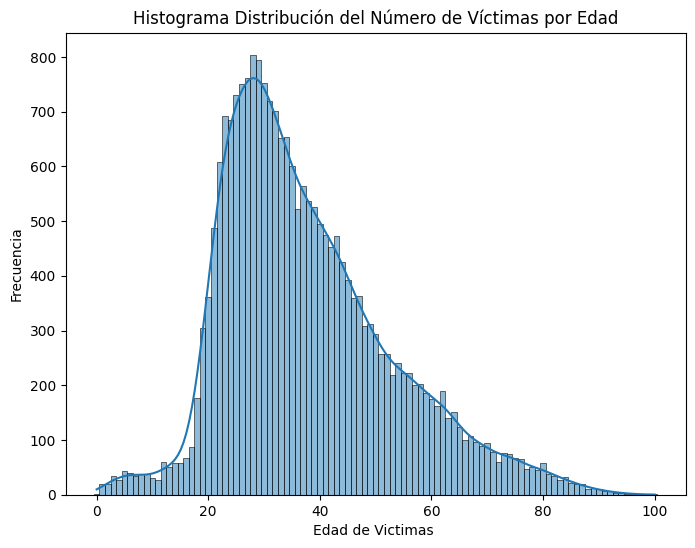

In [ ]:
filtro = limpieza_lesiones_victimas[limpieza_lesiones_victimas['EDAD_VICTIMA'] != 'sd']
filtro1 = filtro[filtro['EDAD_VICTIMA'] != 'SD']

plt.figure(figsize=(8, 6))
sns.histplot(filtro1['EDAD_VICTIMA'], bins=20, kde=True)
plt.xlabel('Edad de Victimas ')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución del Número de Víctimas por Edad')
plt.show()

**Exploracion de variables categoricas**

<ipython-input-73-10e45cfdf71d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-10e45cfdf71d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



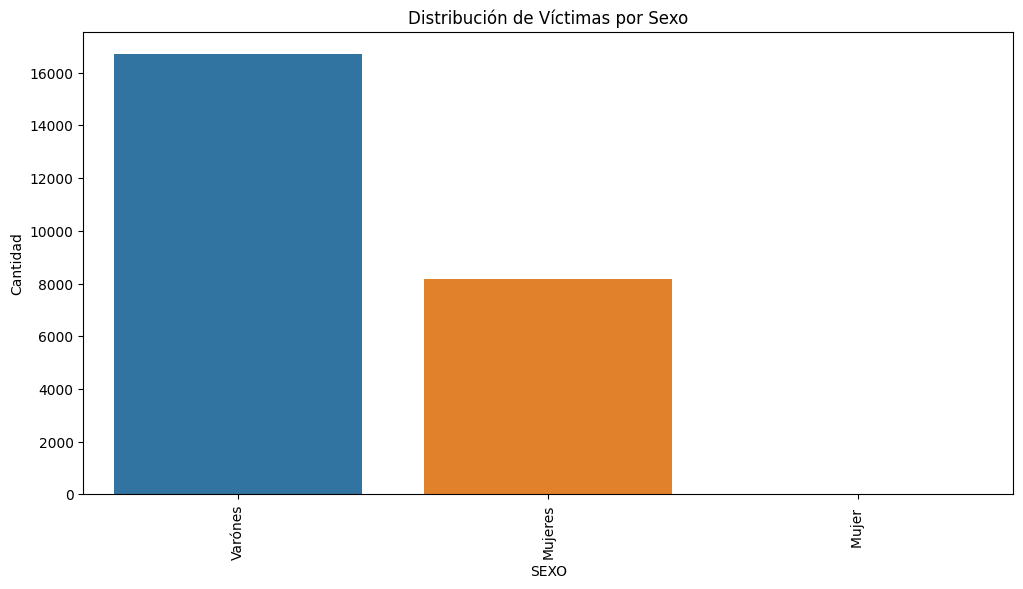

In [ ]:
filtro = limpieza_lesiones_victimas[limpieza_lesiones_victimas['SEXO'] != 'SD']
filtro1 = filtro[filtro['SEXO'] != 'sd']

filtro1['SEXO'] = filtro1['SEXO'].replace(['mujer', 'Mujer', 'MUJER'], 'Mujeres')
filtro1['SEXO'] = filtro1['SEXO'].replace(['varon', 'Varon', 'VARON'], 'Varónes')

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=filtro1, x='SEXO')
plt.xticks(rotation=90)
plt.xlabel('SEXO')
plt.ylabel('Cantidad')
plt.title('Distribución de Víctimas por Sexo')
plt.show()



# **EDA - ANALISIS DE DATOS EXPLORATORIO II**

**HOMICIDIOS - HECHOS**

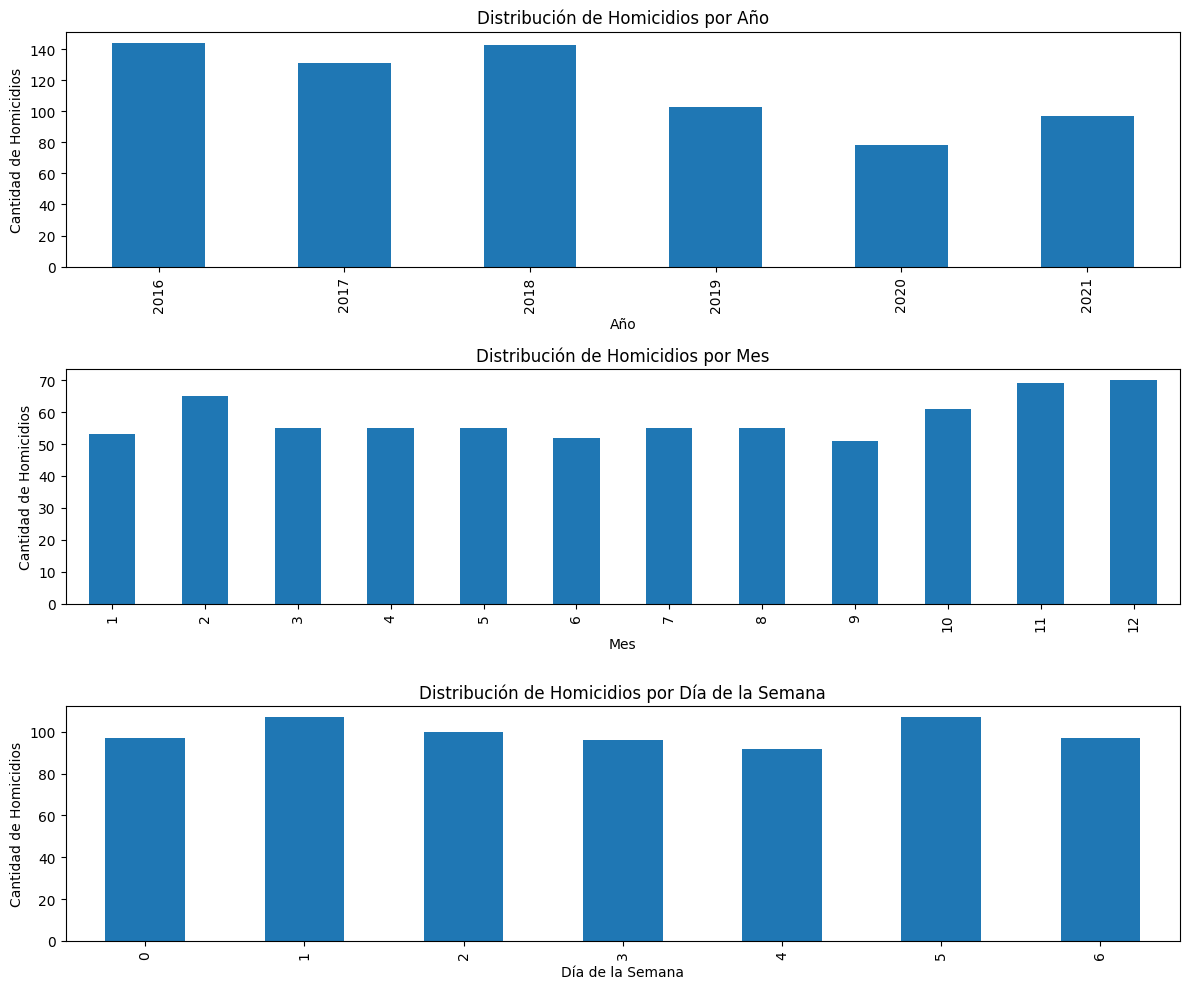

In [ ]:

limpieza_data_homicidios['FECHA'] = pd.to_datetime(limpieza_data_homicidios['FECHA'])


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))


limpieza_data_homicidios.groupby(limpieza_data_homicidios['FECHA'].dt.year)['ID'].count().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad de Homicidios')
axes[0].set_title('Distribución de Homicidios por Año')


limpieza_data_homicidios.groupby(limpieza_data_homicidios['FECHA'].dt.month)['ID'].count().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad de Homicidios')
axes[1].set_title('Distribución de Homicidios por Mes')


limpieza_data_homicidios.groupby(limpieza_data_homicidios['FECHA'].dt.dayofweek)['ID'].count().plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('Día de la Semana')
axes[2].set_ylabel('Cantidad de Homicidios')
axes[2].set_title('Distribución de Homicidios por Día de la Semana')

plt.tight_layout()
plt.show()


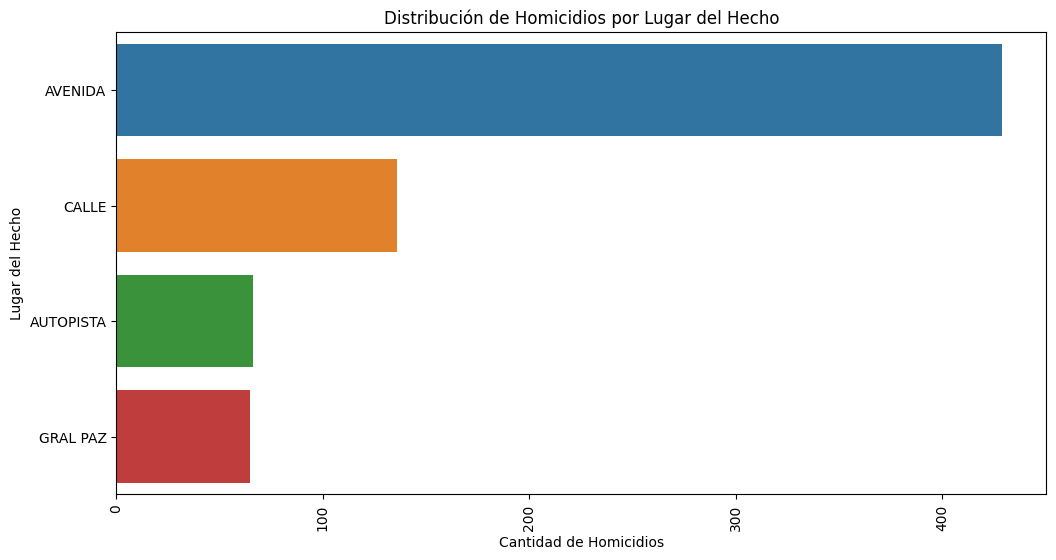

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=limpieza_data_homicidios, y='TIPO_DE_CALLE', order=limpieza_data_homicidios['TIPO_DE_CALLE'].value_counts().index)
plt.xlabel('Cantidad de Homicidios')
plt.ylabel('Lugar del Hecho')
plt.title('Distribución de Homicidios por Lugar del Hecho')
plt.xticks(rotation=90)
plt.show()


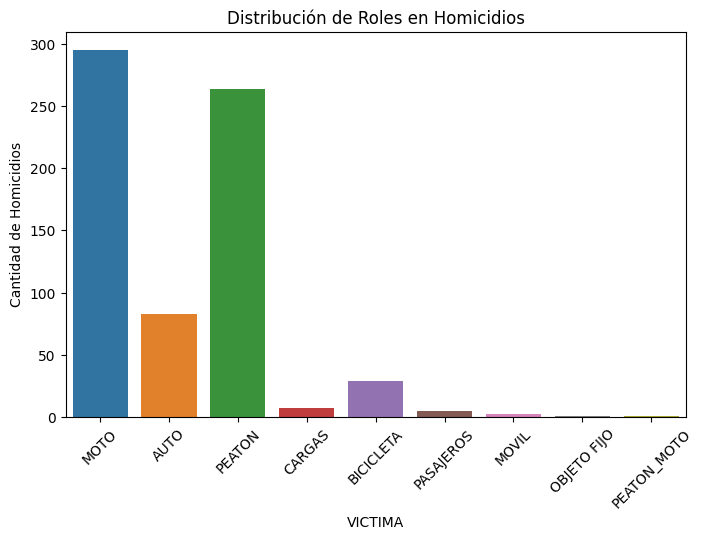

ACUSADO      AUTO  BICICLETA  CARGAS  MOTO  MULTIPLE  OBJETO FIJO  OTRO  \
VICTIMA                                                                   
AUTO           31          0      14     0         3           21     1   
BICICLETA       8          0      10     0         1            0     1   
CARGAS          1          0       4     0         0            1     0   
MOTO           83          2      78    25         8           40     4   
MOVIL           0          0       1     0         0            0     0   
OBJETO FIJO     1          0       0     0         0            0     0   
PASAJEROS       1          0       0     0         0            0     0   
PEATON         77          5      38    30         5            0     0   
PEATON_MOTO     0          0       0     1         0            0     0   

ACUSADO      PASAJEROS  SD  TREN  
VICTIMA                           
AUTO                 9   4     0  
BICICLETA            8   0     1  
CARGAS               1   0     0  

In [ ]:
filtro = limpieza_data_homicidios[limpieza_data_homicidios['VICTIMA'] != 'SD']

plt.figure(figsize=(8, 5))
sns.countplot(data=filtro, x='VICTIMA')
plt.xlabel('VICTIMA')
plt.ylabel('Cantidad de Homicidios')
plt.title('Distribución de Roles en Homicidios')
plt.xticks(rotation=45)
plt.show()



# Tabla de contingencia de roles de víctimas y acusados
tabla_de_contingencia= pd.crosstab(filtro['VICTIMA'], filtro['ACUSADO'])
print(tabla_de_contingencia)


**HOMICIDIOS - VICTIMAS**

<ipython-input-77-f5ede4c59b23>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



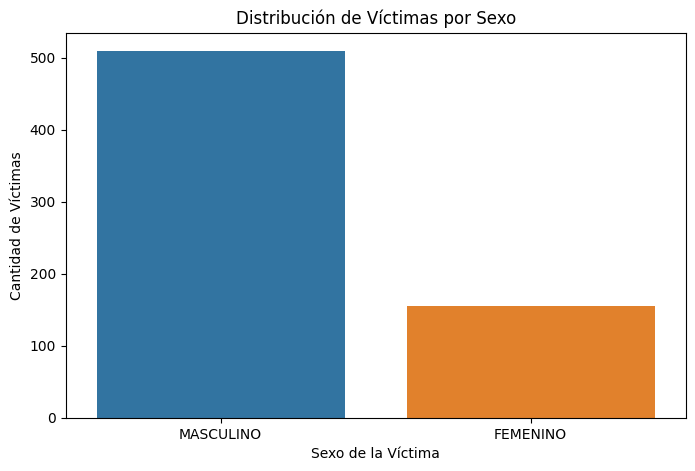

Edad media de las víctimas: 42.16716867469879
Edad mediana de las víctimas: 37.0
Desviación estándar de la edad de las víctimas: 19.78803378208527
Prueba t: Estadístico t = nan, Valor p = nan


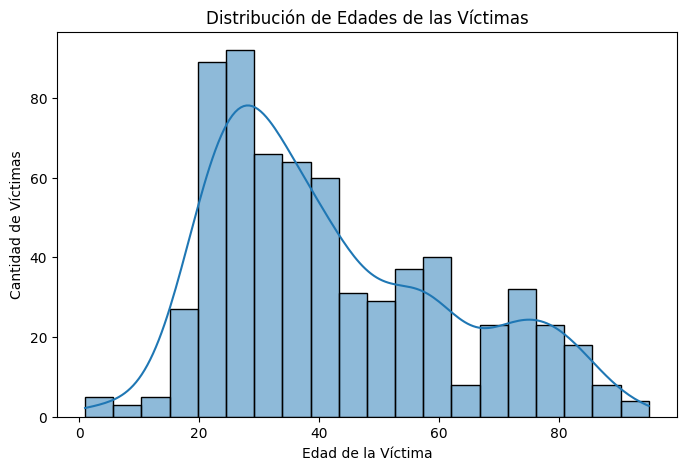

In [ ]:
filtro = limpieza_data_victimas[limpieza_data_victimas['SEXO'] != 'SD']
filtro = limpieza_data_victimas[limpieza_data_victimas['EDAD'] != 'SD']
filtro['EDAD'] = filtro['EDAD'].astype(int)  # Si la edad es un número entero

# Gráfico de barras de distribución de víctimas por sexo
plt.figure(figsize=(8, 5))
sns.countplot(filtro, x='SEXO')
plt.xlabel('Sexo de la Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.title('Distribución de Víctimas por Sexo')
plt.show()

# Estadísticas descriptivas de la edad de las víctimas
edad_media = filtro['EDAD'].mean()
edad_mediana = filtro['EDAD'].median()
edad_desviacion = filtro['EDAD'].std()

print(f"Edad media de las víctimas: {edad_media}")
print(f"Edad mediana de las víctimas: {edad_mediana}")
print(f"Desviación estándar de la edad de las víctimas: {edad_desviacion}")

# Prueba t para comparar la edad de víctimas por género (ejemplo)
sexo_masculino = filtro[filtro['SEXO'] == 'Masculino']['EDAD']
sexo_femenino = filtro[filtro['SEXO'] == 'Femenino']['EDAD']

t_stat, p_value = ttest_ind(sexo_masculino, sexo_femenino)
print(f"Prueba t: Estadístico t = {t_stat}, Valor p = {p_value}")

# Gráfico de distribución de edades de las víctimas
plt.figure(figsize=(8, 5))
sns.histplot(data=filtro, x='EDAD', bins=20, kde=True)
plt.xlabel('Edad de la Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.title('Distribución de Edades de las Víctimas')
plt.show()


# **KPIs**



---


**Debes graficar y medir los 2 KPIs propuestos a continuación, representándolos adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la temática. **


---





**1.   Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.**




In [ ]:
df_id_victimas.shape

(696, 8)

In [ ]:
df_id_victimas.head(5)

,ID,Nro_victimas,Fecha,Año,Mes,Dia,Hora,Franja_horaria
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4
1,2016-0002,1,2016-02-01,2016,1,2,01:15:00,1
2,2016-0003,1,2016-03-01,2016,1,3,07:00:00,7
3,2016-0004,1,2016-10-01,2016,1,10,00:00:00,0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5


In [ ]:


                          # Año y Mes /cantidad de homicidios en cada grupo
homicidios_por_mes_y_anio = df_id_victimas.groupby(['Año', 'Mes'])['Nro_victimas'].count().reset_index()

                          # Renombre
homicidios_por_mes_y_anio = homicidios_por_mes_y_anio.rename(columns={'Nro_victimas': 'Cantidad de Homicidios'})


print(homicidios_por_mes_y_anio)


     Año  Mes  Cantidad de Homicidios
0   2016    1                       8
1   2016    2                      12
2   2016    3                      12
3   2016    4                      11
4   2016    5                       7
..   ...  ...                     ...
67  2021    8                       9
68  2021    9                       4
69  2021   10                       5
70  2021   11                       8
71  2021   12                       9

[72 rows x 3 columns]


In [ ]:
homicidios_por_mes_y_anio.tail()

,Año,Mes,Cantidad de Homicidios
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8
71,2021,12,9


In [ ]:
# Guardar el DataFrame en un archivo CSV
homicidios_por_mes_y_anio.to_csv('PBi_kpis1.csv', index=False)

In [ ]:

df_2016 = homicidios_por_mes_y_anio[homicidios_por_mes_y_anio['Año'] == 2018]


primer_semestre = df_2016[df_2016['Mes'].between(1, 6)]['Cantidad de Homicidios'].sum()


segundo_semestre = df_2016[df_2016['Mes'].between(7, 12)]['Cantidad de Homicidios'].sum()

print(f"Primer semestre (meses 1 al 6): {primer_semestre}")
print(f"Segundo semestre (meses 7 al 12): {segundo_semestre}")


Primer semestre (meses 1 al 6): 67
Segundo semestre (meses 7 al 12): 76


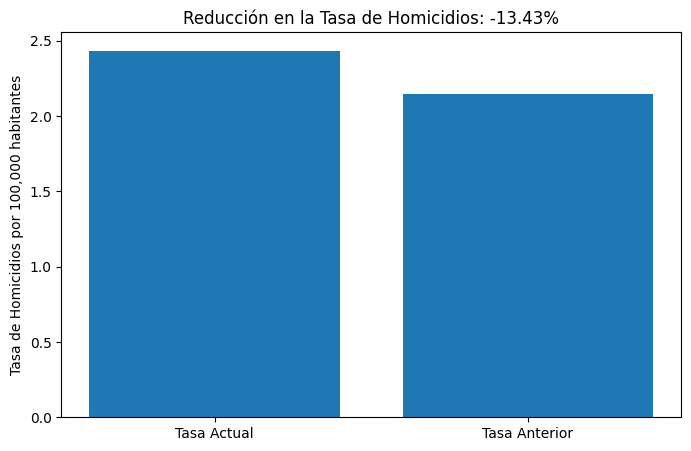

In [ ]:

                                  # tasa de homicidios para los últimos seis meses y para el semestre anterior

tasa_homicidios_actual = ((segundo_semestre/3120612) * 100000)

                                  # tasa de homicidios para el semestre anterior

tasa_homicidios_anterior =  ((primer_semestre/3120612)*100000)

                                  # reducción en porcentaje
reduccion_porcentaje = ((tasa_homicidios_anterior - tasa_homicidios_actual) / tasa_homicidios_anterior) * 100

                                  # Grafica de la reducción en un gráfico de barras

plt.figure(figsize=(8, 5))
plt.bar(['Tasa Actual', 'Tasa Anterior'], [tasa_homicidios_actual, tasa_homicidios_anterior])
plt.ylabel('Tasa de Homicidios por 100,000 habitantes')
plt.title(f'Reducción en la Tasa de Homicidios: {reduccion_porcentaje:.2f}%')
plt.show()



**2.   Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.**





In [ ]:
limpieza_data_victimas.tail(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-02-01
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20


In [ ]:
filtro = limpieza_data_victimas[limpieza_data_victimas['FECHA_FALLECIMIENTO'] != 'NaT']
filtro = limpieza_data_victimas[limpieza_data_victimas['VICTIMA'] != 'SD']
filtro = limpieza_data_victimas[limpieza_data_victimas['VICTIMA'] == 'MOTO']

# Agrupa por año y victima, y cuenta la cantidad de fallecimiento en cada grupo
fallecimineto_victima_y_anio = filtro.groupby(['AAAA', 'VICTIMA'])['FECHA_FALLECIMIENTO'].count().reset_index()

# Renombra la columna de la cuenta
fallecimineto_victima_y_anio= fallecimineto_victima_y_anio.rename(columns={'FECHA_FALLECIMIENTO': 'Cantidad de fallecidos'})
fallecimineto_victima_y_anio= fallecimineto_victima_y_anio.rename(columns={'AAAA': 'AÑO'})

# Muestra el DataFrame resultante
print(fallecimineto_victima_y_anio)

    AÑO VICTIMA  Cantidad de fallecidos
0  2016    MOTO                      37
1  2017    MOTO                      54
2  2018    MOTO                      57
3  2019    MOTO                      50
4  2020    MOTO                      29
5  2021    MOTO                      46


In [ ]:
# Guardar el DataFrame en un archivo CSV
fallecimineto_victima_y_anio.to_csv('PBi_kpis2.csv', index=False)

In [ ]:

año_actual = 2021
df_año_actual = fallecimineto_victima_y_anio[fallecimineto_victima_y_anio['AÑO'] == año_actual]

                    # DataFrame para el año anterior (por ejemplo, 2021)
año_anterior = año_actual - 1
df_año_anterior = fallecimineto_victima_y_anio[fallecimineto_victima_y_anio['AÑO'] == año_anterior]

                    # cantidad de fallecidos en el año actual
fallecidos_año_actual = df_año_actual['Cantidad de fallecidos'].sum()

                    #cantidad de fallecidos en el año anterior
fallecidos_año_anterior = df_año_anterior['Cantidad de fallecidos'].sum()

print(f"Año anterior ({año_anterior}): {fallecidos_año_anterior} fallecidos")
print(f"Año actual ({año_actual}): {fallecidos_año_actual} fallecidos")


Año anterior (2020): 29 fallecidos
Año actual (2021): 46 fallecidos


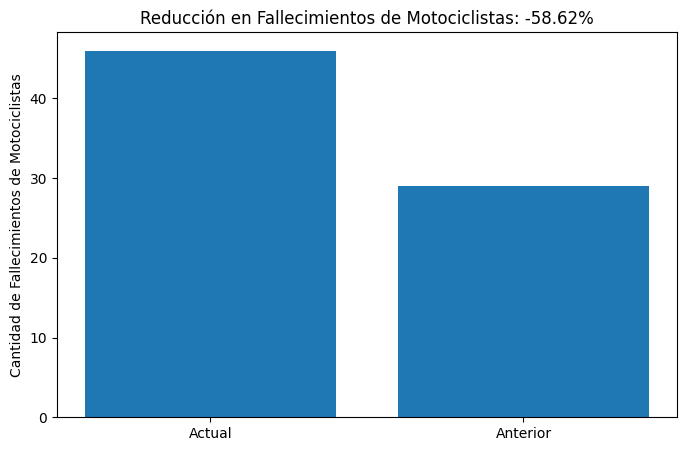

In [ ]:


                          # cantidad de accidentes mortales de motociclistas en el último año y en el año anterior

fallecidos_año_actual = df_año_actual['Cantidad de fallecidos'].sum()

fallecidos_año_anterior = df_año_anterior['Cantidad de fallecidos'].sum()


                          # reducción en porcentaje
reduccion_porcentaje = ((fallecidos_año_anterior - fallecidos_año_actual) / fallecidos_año_anterior) * 100

                          # Grafica la reducción en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(['Actual', 'Anterior'], [fallecidos_año_actual, fallecidos_año_anterior])
plt.ylabel('Cantidad de Fallecimientos de Motociclistas')
plt.title(f'Reducción en Fallecimientos de Motociclistas: {reduccion_porcentaje:.2f}%')
plt.show()


**Este KPI se centrará en analizar la tasa de accidentes según el tipo de vehículo involucrado (por ejemplo, moto, auto, transporte público, camión, ciclista) en un período de tiempo específico. La idea es calcular la tasa de accidentes para cada tipo de vehículo y compararla con un período anterior para evaluar si ha habido mejoras en la seguridad vial.**

In [ ]:
limpieza_lesiones_hechos.head(5)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [ ]:
filtro = limpieza_lesiones_hechos[limpieza_lesiones_hechos['victima'] != 'SD']
filtro = limpieza_lesiones_hechos[limpieza_lesiones_hechos['acusado'] != 'SD']

filtro = limpieza_lesiones_hechos[limpieza_lesiones_hechos['victima'] == 'AUTO']
#filtro = limpieza_lesiones_hechos[limpieza_lesiones_hechos['acusado'] == 'AUTO']

# Agrupa por año y victima, y cuenta la cantidad de fallecimiento en cada grupo

accidente_involucrado_victimas = filtro.groupby(['aaaa', 'victima'])['id'].count().reset_index()

# Renombra la columna de la cuenta

accidente_involucrado_victimas= accidente_involucrado_victimas.rename(columns={'id': 'Cantidad de Accidentes'})
accidente_involucrado_victimas= accidente_involucrado_victimas.rename(columns={'aaaa': 'año'})

# Muestra el DataFrame resultante
print(accidente_involucrado_victimas)

    año victima  Cantidad de Accidentes
0  2019    AUTO                     813
1  2020    AUTO                     595
2  2021    AUTO                     625


In [ ]:
año_actual = 2020
df_año_actual = accidente_involucrado_victimas[accidente_involucrado_victimas['año'] == año_actual]

                    # DataFrame para el año anterior (por ejemplo, 2021)
año_anterior = año_actual - 1
df_año_anterior = accidente_involucrado_victimas[accidente_involucrado_victimas['año'] == año_anterior]

                    # cantidad de accidente - año actual
accidentes_año_actual = df_año_actual['Cantidad de Accidentes'].sum()

                    #cantidad de accidente - año anterior
accidentes_año_anterior = df_año_anterior['Cantidad de Accidentes'].sum()

print(f"Año anterior ({df_año_anterior}): {accidentes_año_anterior} accidentes")
print(f"Año actual ({df_año_actual}): {accidentes_año_actual} accidentes")


Año anterior (    año victima  Cantidad de Accidentes
0  2019    AUTO                     813): 813 accidentes
Año actual (    año victima  Cantidad de Accidentes
1  2020    AUTO                     595): 595 accidentes


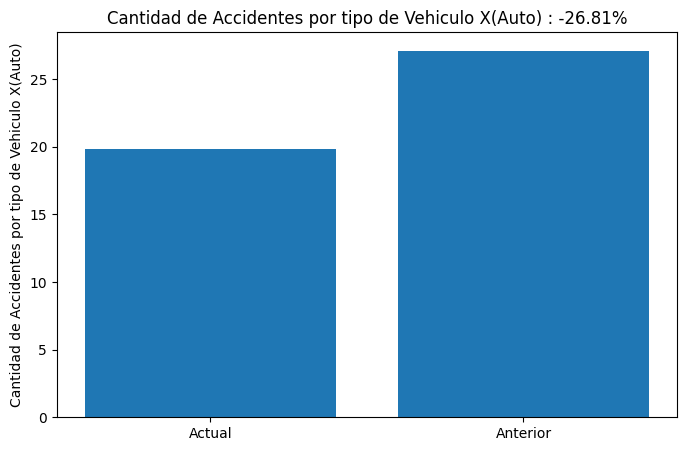

In [ ]:
                                  # Calcular la tasa de accidentes mortales por tipo de vehículo para el año actual

poblacion_total = 3000000

tasa_accidentes_año_actual = (accidentes_año_actual / poblacion_total) * 100000


                                # Calcular la tasa de accidentes mortales por tipo de vehículo para el año anterior

tasa_accidentes_año_anterior = (accidentes_año_anterior / poblacion_total) * 100000

                               # Calcular la diferencia en porcentaje entre las tasas de accidentes mortales

diferencia_porcentaje = ((tasa_accidentes_año_actual - tasa_accidentes_año_anterior) / tasa_accidentes_año_anterior) * 100

                              # Graficar la diferencia en porcentaje por tipo de vehículo

# Graficar la diferencia en porcentaje por tipo de vehículo
plt.figure(figsize=(8, 5))
plt.bar(['Actual', 'Anterior'], [tasa_accidentes_año_actual, tasa_accidentes_año_anterior])
plt.ylabel('Cantidad de Accidentes por tipo de Vehiculo X(Auto)')
plt.title(f'Cantidad de Accidentes por tipo de Vehiculo X(Auto) : {diferencia_porcentaje:.2f}%')
plt.show()






